In [1]:
import os

In [4]:
from telco_setup import telco_imports


In [5]:
telco_imports()


import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from modeling import confusion, random_forest_models
    


In [6]:
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from stat_tools import *
from sklearn.model_selection import train_test_split
import acquire
import prepare
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from modeling import confusion, random_forest_models

import plotly.express as px

Prepared df: (7043, 16)

Train: (4057, 16)
Validate: (1409, 16)
Test: (1409, 16)


In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# df = acquire.get_telco_data()

In [47]:
df = prepare.fix_nulls()

In [48]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_type,monthly_charges,total_charges,churn,null_charges
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,No,False
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,No,False
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes,False
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes,False
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,Yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,...,Yes,No,No,One year,No,Mailed check,55.15,742.90,No,False
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,Yes,False
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,No,False
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,No,False


In [44]:
# df = prepare.prep_telco_1(df)
df = prepare.prep_telco()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_id                           7043 non-null   object 
 1   senior_citizen                        7043 non-null   int64  
 2   tenure                                7043 non-null   int64  
 3   online_security                       7043 non-null   object 
 4   online_backup                         7043 non-null   object 
 5   device_protection                     7043 non-null   object 
 6   tech_support                          7043 non-null   object 
 7   streaming_tv                          7043 non-null   object 
 8   streaming_movies                      7043 non-null   object 
 9   monthly_charges                       7043 non-null   float64
 10  total_charges                         7043 non-null   float64
 11  partner_Yes      

In [46]:
df

,customer_id,senior_citizen,tenure,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,...,phone_service_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,paperless_billing_Yes,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,churn_Yes
0,0002-ORFBO,0,9,No,Yes,No,Yes,Yes,No,65.60,...,1,0,0,1,0,1,0,0,1,0
1,0003-MKNFE,0,9,No,No,No,No,No,Yes,59.90,...,1,0,0,0,0,0,0,0,1,0
2,0004-TLHLJ,0,4,No,No,Yes,No,No,No,73.90,...,1,1,0,0,0,1,0,1,0,1
3,0011-IGKFF,1,13,No,Yes,Yes,No,Yes,Yes,98.00,...,1,1,0,0,0,1,0,1,0,1
4,0013-EXCHZ,1,3,No,No,No,Yes,Yes,No,83.90,...,1,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,13,Yes,No,No,Yes,No,No,55.15,...,1,0,0,1,0,0,0,0,1,0
7039,9992-RRAMN,0,22,No,No,No,No,No,Yes,85.10,...,1,1,0,0,0,1,0,1,0,1
7040,9992-UJOEL,0,2,No,Yes,No,No,No,No,50.30,...,1,0,0,0,0,1,0,0,1,0
7041,9993-LHIEB,0,67,Yes,No,Yes,Yes,No,Yes,67.85,...,1,0,0,0,1,0,0,0,1,0


In [49]:
# df.drop(columns=['customer_id', 'gender', 'streaming_tv', 'streaming_movies'])
df.columns.to_list()

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'internet_service_type',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract_type',
 'paperless_billing',
 'payment_type',
 'monthly_charges',
 'total_charges',
 'churn',
 'null_charges']

In [50]:
df = df[[ 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'internet_service_type',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'contract_type',
 'paperless_billing',
 'payment_type',
 'monthly_charges',
 'total_charges',
 'churn',
 ]]

In [51]:
df

,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type,online_security,online_backup,device_protection,tech_support,contract_type,paperless_billing,payment_type,monthly_charges,total_charges,churn
0,0,Yes,Yes,9,Yes,DSL,No,Yes,No,Yes,One year,Yes,Mailed check,65.60,593.30,No
1,0,No,No,9,Yes,DSL,No,No,No,No,Month-to-month,No,Mailed check,59.90,542.40,No
2,0,No,No,4,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes
3,1,Yes,No,13,Yes,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes
4,1,Yes,No,3,Yes,Fiber optic,No,No,No,Yes,Month-to-month,Yes,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,No,No,13,Yes,DSL,Yes,No,No,Yes,One year,No,Mailed check,55.15,742.90,No
7039,0,Yes,No,22,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,85.10,1873.70,Yes
7040,0,No,No,2,Yes,DSL,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,No
7041,0,Yes,Yes,67,Yes,DSL,Yes,No,Yes,Yes,Two year,No,Mailed check,67.85,4627.65,No


In [41]:
df.partner.map({'Yes': 1,
                'No': 0
               }).value_counts(dropna=False)

0    3641
1    3402
Name: partner, dtype: int64

In [43]:
df.partner.map({'Yes': 1,
                'No': 0
               })

In [58]:
# Lets get rid of the telephone only customers and focus on internet customers

for i in df[['partner', 'dependents', 'phone_service',
             'online_security', 'online_backup', 'device_protection',
             'tech_support', 'paperless_billing', 'churn'
            ]]:
    look = df[i].map({'Yes': 1, 'No': 0, })#'No internet service': 0 })
    print(look.value_counts(dropna=False))
#     df[i] = df[i].map({'Yes':        
#     })

0    3641
1    3402
Name: partner, dtype: int64
0    4933
1    2110
Name: dependents, dtype: int64
1    6361
0     682
Name: phone_service, dtype: int64
0.0    3498
1.0    2019
NaN    1526
Name: online_security, dtype: int64
0.0    3088
1.0    2429
NaN    1526
Name: online_backup, dtype: int64
0.0    3095
1.0    2422
NaN    1526
Name: device_protection, dtype: int64
0.0    3473
1.0    2044
NaN    1526
Name: tech_support, dtype: int64
1    4171
0    2872
Name: paperless_billing, dtype: int64
0    5174
1    1869
Name: churn, dtype: int64


In [59]:
# internet_df = 
# df.drop(index=
df.online_security[df.online_security == 'No internet service']
#        )

20      No internet service
23      No internet service
24      No internet service
27      No internet service
28      No internet service
               ...         
7026    No internet service
7028    No internet service
7032    No internet service
7033    No internet service
7037    No internet service
Name: online_security, Length: 1526, dtype: object

In [60]:
# internet_df = 
# df.drop(index=
df.online_security[df.online_security == 'No internet service'].index
#        )

Int64Index([  20,   23,   24,   27,   28,   29,   31,   33,   35,   38,
            ...
            7014, 7015, 7021, 7022, 7024, 7026, 7028, 7032, 7033, 7037],
           dtype='int64', length=1526)

In [61]:
# internet_df = 
df.drop(index=df.online_security[df.online_security == 'No internet service'].index
       )

,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type,online_security,online_backup,device_protection,tech_support,contract_type,paperless_billing,payment_type,monthly_charges,total_charges,churn
0,0,Yes,Yes,9,Yes,DSL,No,Yes,No,Yes,One year,Yes,Mailed check,65.60,593.30,No
1,0,No,No,9,Yes,DSL,No,No,No,No,Month-to-month,No,Mailed check,59.90,542.40,No
2,0,No,No,4,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes
3,1,Yes,No,13,Yes,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes
4,1,Yes,No,3,Yes,Fiber optic,No,No,No,Yes,Month-to-month,Yes,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,No,No,13,Yes,DSL,Yes,No,No,Yes,One year,No,Mailed check,55.15,742.90,No
7039,0,Yes,No,22,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,85.10,1873.70,Yes
7040,0,No,No,2,Yes,DSL,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,No
7041,0,Yes,Yes,67,Yes,DSL,Yes,No,Yes,Yes,Two year,No,Mailed check,67.85,4627.65,No


In [62]:
internet_df = \
df.drop(index = df.online_security\
        [df.online_security == 'No internet service'].index
       )
internet_df

,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type,online_security,online_backup,device_protection,tech_support,contract_type,paperless_billing,payment_type,monthly_charges,total_charges,churn
0,0,Yes,Yes,9,Yes,DSL,No,Yes,No,Yes,One year,Yes,Mailed check,65.60,593.30,No
1,0,No,No,9,Yes,DSL,No,No,No,No,Month-to-month,No,Mailed check,59.90,542.40,No
2,0,No,No,4,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes
3,1,Yes,No,13,Yes,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes
4,1,Yes,No,3,Yes,Fiber optic,No,No,No,Yes,Month-to-month,Yes,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,No,No,13,Yes,DSL,Yes,No,No,Yes,One year,No,Mailed check,55.15,742.90,No
7039,0,Yes,No,22,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,85.10,1873.70,Yes
7040,0,No,No,2,Yes,DSL,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,No
7041,0,Yes,Yes,67,Yes,DSL,Yes,No,Yes,Yes,Two year,No,Mailed check,67.85,4627.65,No


In [65]:
for i in internet_df[['partner', 'dependents', 'phone_service',
             'online_security', 'online_backup', 'device_protection',
             'tech_support', 'paperless_billing', 'churn'
            ]]:
    look = internet_df[i].map({'Yes': 1, 'No': 0, })#'No internet service': 0 })
    print(look.value_counts(dropna=False))

0    2853
1    2664
Name: partner, dtype: int64
0    4050
1    1467
Name: dependents, dtype: int64
1    4835
0     682
Name: phone_service, dtype: int64
0    3498
1    2019
Name: online_security, dtype: int64
0    3088
1    2429
Name: online_backup, dtype: int64
0    3095
1    2422
Name: device_protection, dtype: int64
0    3473
1    2044
Name: tech_support, dtype: int64
1    3725
0    1792
Name: paperless_billing, dtype: int64
0    3761
1    1756
Name: churn, dtype: int64


In [66]:
for i in internet_df[['partner', 'dependents', 'phone_service',
             'online_security', 'online_backup', 'device_protection',
             'tech_support', 'paperless_billing', 'churn'
            ]]:
    look = internet_df[i].map({'Yes': 1, 'No': 0, })#'No internet service': 0 })
#     print(look.value_counts(dropna=False))
    internet_df[i] = look
internet_df

,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type,online_security,online_backup,device_protection,tech_support,contract_type,paperless_billing,payment_type,monthly_charges,total_charges,churn
0,0,1,1,9,1,DSL,0,1,0,1,One year,1,Mailed check,65.60,593.30,0
1,0,0,0,9,1,DSL,0,0,0,0,Month-to-month,0,Mailed check,59.90,542.40,0
2,0,0,0,4,1,Fiber optic,0,0,1,0,Month-to-month,1,Electronic check,73.90,280.85,1
3,1,1,0,13,1,Fiber optic,0,1,1,0,Month-to-month,1,Electronic check,98.00,1237.85,1
4,1,1,0,3,1,Fiber optic,0,0,0,1,Month-to-month,1,Mailed check,83.90,267.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,13,1,DSL,1,0,0,1,One year,0,Mailed check,55.15,742.90,0
7039,0,1,0,22,1,Fiber optic,0,0,0,0,Month-to-month,1,Electronic check,85.10,1873.70,1
7040,0,0,0,2,1,DSL,0,1,0,0,Month-to-month,1,Mailed check,50.30,92.75,0
7041,0,1,1,67,1,DSL,1,0,1,1,Two year,0,Mailed check,67.85,4627.65,0


In [67]:
# train, validate, test = prepare.split_data(df, 'churn1')
train, validate, test = prepare.split_data(internet_df, 'churn')

Prepared df: (5517, 16)

Train: (3309, 16)
Validate: (1104, 16)
Test: (1104, 16)


In [68]:
train

,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type,online_security,online_backup,device_protection,tech_support,contract_type,paperless_billing,payment_type,monthly_charges,total_charges,churn
2429,0,1,0,57,0,DSL,0,1,1,1,Two year,1,Bank transfer (automatic),57.50,3265.95,0
4679,0,1,0,47,1,Fiber optic,0,1,1,1,Month-to-month,1,Electronic check,109.55,5124.55,1
3233,1,0,0,15,1,Fiber optic,0,0,0,0,Month-to-month,1,Electronic check,79.40,1156.10,1
1982,0,0,0,1,1,Fiber optic,0,0,0,0,Month-to-month,0,Electronic check,80.50,80.50,1
6939,0,0,1,4,0,DSL,1,1,1,0,Month-to-month,1,Mailed check,57.20,223.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,0,1,1,67,1,DSL,1,1,0,1,One year,0,Mailed check,60.05,3994.05,0
4016,0,1,1,42,0,DSL,1,0,1,1,Two year,0,Credit card (automatic),48.15,2032.30,0
4963,0,1,1,39,1,Fiber optic,0,1,0,0,Month-to-month,1,Mailed check,86.30,3266.00,1
3300,1,0,0,1,1,DSL,0,0,0,0,Month-to-month,0,Electronic check,45.20,45.20,0


In [72]:
px.histogram(data_frame=train, 
             x='monthly_charges', 
             y='churn',
             color='internet_service_type',
            )

In [82]:
px.sunburst(train, 
            color='churn',
            path=['tenure', 'internet_service_type'],
            maxdepth=4
           )

In [91]:
px.sunburst(train, 
            color='churn',
            path=['internet_service_type', 'online_backup','tenure',],
            maxdepth=4
           )

## Things from the graph above

1. Fiber optic customers = 1847<br>DSL customers = 1462
  - $\large\frac{Fiber=1847, Churn^R 42\%}{DSL=1462, Churn^R 19\%}$
  - Fiber optic customers w/out online backup churn at 50%
  - Fiber optic customers with online backup still churn at 32%
    - DSL w/out online backup churn at 25%
    - DSL with online backup churn at 11%
  - 

In [92]:
1847/(1847+1462)

0.5581746751284375

In [93]:
 1847+1462

3309

In [94]:
804/1847

0.43530048727666487

In [74]:
px.sunburst(train, 
            color='tenure' ,
            path=['churn', 'internet_service_type']
           )

In [79]:
train['churn_no_churn'] = train.churn.map({1:'Churn', 0:'Stay With Us'})

In [99]:
px.sunburst(train, 
            color='monthly_charges' ,
            path=['churn_no_churn', 'internet_service_type'],
            title='''Those Who Churn, Pay Less!?            ''',
#             hover_data=[]
           )

In [100]:
px.sunburst(train, 
            color='monthly_charges' ,
            path=['churn_no_churn', 'internet_service_type', 'tech_support'],
            title='''Those Who Churn, Pay Less!?            ''',
#             hover_data=[]
           )

In [107]:
px.sunburst(train, 
            color='monthly_charges' ,
            path=['churn_no_churn', 'internet_service_type', 'online_backup'],
            title='''Those Who Churn, Pay Less!?''',
#             hover_data=[]
           )

In [388]:
px.sunburst(train, 
            color='monthly_charges' ,
            path=['churn_no_churn', 'internet_service_type', 'online_security'],
            title='''Those Who Churn, Pay Less!?''',
#             hover_data=[]
           )

In [389]:
px.sunburst(train, 
            color='monthly_charges' ,
            path=['churn_no_churn', 'internet_service_type', 'device_protection'],
            title='''Those Who Churn, Pay Less!?''',
#             hover_data=[]
           )

In [108]:
px.sunburst(train, 
            color='monthly_charges' ,
            path=['churn_no_churn', 'internet_service_type', 'payment_type'],
            title='''Those Who Churn, Pay Less!?            ''',
#             hover_data=[]
           )

In [109]:
px.sunburst(df, 
            color='monthly_charges' ,
            path=['churn', 'internet_service_type', 'payment_type'],#'contract_type'],
            title='''Those Who Churn, Pay Less!?            ''',
#             hover_data=[]
           )

In [111]:
px.bar(df, 
       x= ['churn', 'internet_service_type', 'payment_type'],
       y= 'monthly_charges'
      )

In [117]:
px.histogram(df,
             x='internet_service_type',
             color = 'churn', 
#              y='payment_type',         
            )

In [144]:
churners = df[df.churn == 'Yes']
non_churn = df[df.churn == 'No']

In [122]:
px.bar(churners,
       x='internet_service_type',
       y='monthly_charges',
       color = 'payment_type'
      )

count    1297.000000
mean       88.126484
std        11.882834
min        67.750000
25%        78.800000
50%        87.550000
75%        98.400000
max       118.350000
Name: monthly_charges, dtype: float64


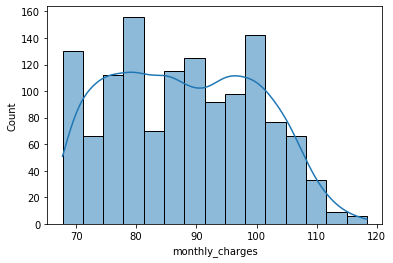

In [152]:
print(churners.monthly_charges[churners.internet_service_type == "Fiber optic"].describe())

sns.histplot(churners.monthly_charges[churners.internet_service_type == 'Fiber optic'],
             kde=True
            )
plt.show()

count    1799.000000
mean       93.932379
std        12.653712
min        68.600000
25%        84.400000
50%        94.800000
75%       104.400000
max       118.750000
Name: monthly_charges, dtype: float64


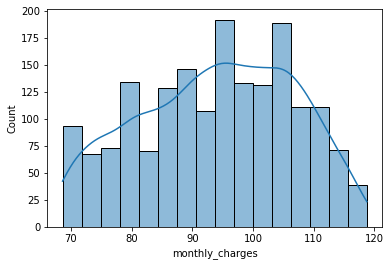

In [153]:
print(non_churn.monthly_charges[non_churn.internet_service_type == "Fiber optic"].describe())

sns.histplot(non_churn.monthly_charges[non_churn.internet_service_type == 'Fiber optic'],
             kde=True
            )
plt.show()

count    459.000000
mean      49.083224
std       13.608829
min       23.450000
25%       42.125000
50%       49.250000
75%       55.675000
max       92.450000
Name: monthly_charges, dtype: float64


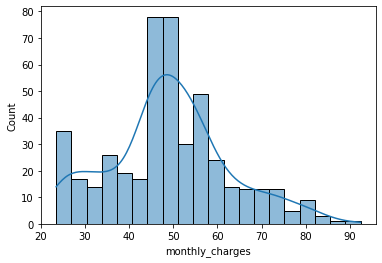

In [147]:
print(churners.monthly_charges[churners.internet_service_type == 'DSL'].describe())

sns.histplot(churners.monthly_charges[churners.internet_service_type == 'DSL'],
             kde=True
            )
plt.show()

count    1962.000000
mean       60.212105
std        16.109146
min        24.150000
25%        49.700000
50%        59.750000
75%        72.100000
max        94.800000
Name: monthly_charges, dtype: float64


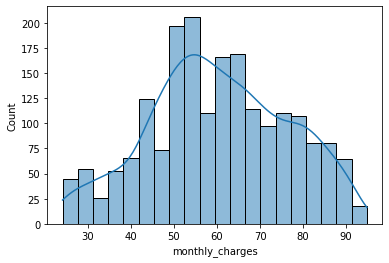

In [154]:
print(non_churn.monthly_charges[non_churn.internet_service_type == 'DSL'].describe())

sns.histplot(non_churn.monthly_charges[non_churn.internet_service_type == 'DSL'],
             kde=True
            )
plt.show()

count    113.000000
mean      20.368142
std        1.456851
min       18.850000
25%       19.650000
50%       20.000000
75%       20.350000
max       25.900000
Name: monthly_charges, dtype: float64


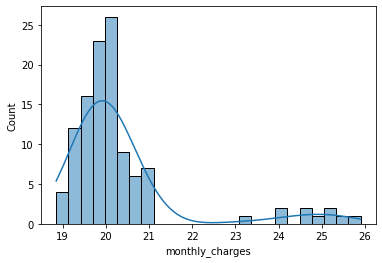

In [148]:
print(churners.monthly_charges[churners.internet_service_type == 'None'].describe())

sns.histplot(churners.monthly_charges[churners.internet_service_type == 'None'],
             kde=True
            )
plt.show()

count    1413.000000
mean       21.136058
std         2.201510
min        18.250000
25%        19.700000
50%        20.150000
75%        21.000000
max        26.900000
Name: monthly_charges, dtype: float64


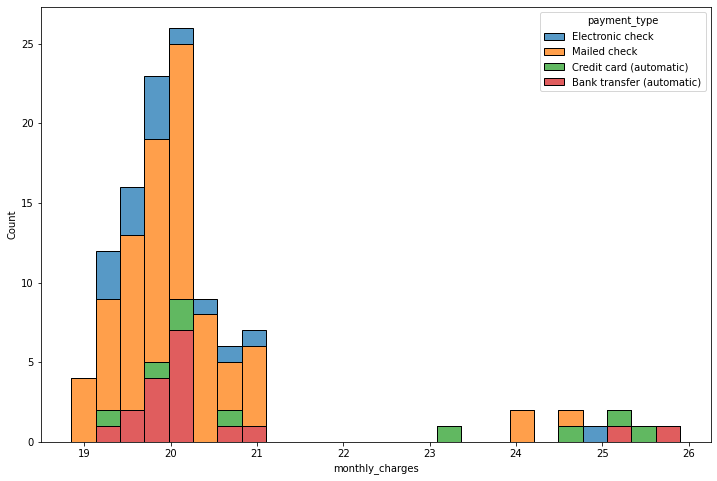

In [169]:
print(non_churn.monthly_charges[non_churn.internet_service_type == 'None'].describe())

plt.figure(figsize=(12,8))
sns.histplot(churners[churners.internet_service_type == 'None'],
             x='monthly_charges',
#              kde=True,
             color='Red',
             hue=churners.payment_type,
             multiple='stack'
            )
# sns.histplot(non_churn.monthly_charges[non_churn.internet_service_type == 'None'],
#              kde=True,
#              color='Gray'
#             )
plt.show()

Non Churning Customers --- Monthly Charges

count    1413.000000
mean       21.136058
std         2.201510
min        18.250000
25%        19.700000
50%        20.150000
75%        21.000000
max        26.900000
Name: monthly_charges, dtype: float64 
________________________________
Churning Customers --- Monthly Charges

count    113.000000
mean      20.368142
std        1.456851
min       18.850000
25%       19.650000
50%       20.000000
75%       20.350000
max       25.900000
Name: monthly_charges, dtype: float64 



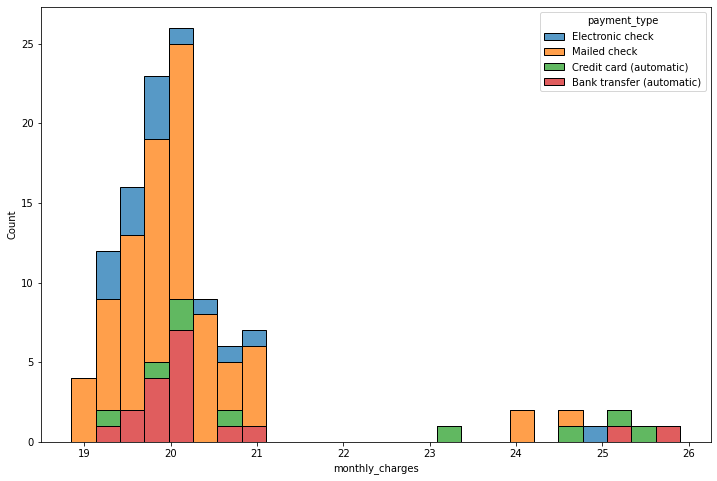

In [173]:
print('Non Churning Customers --- Monthly Charges\n')
print(non_churn.monthly_charges[non_churn.internet_service_type == 'None'].describe(),'\n________________________________')
print('Churning Customers --- Monthly Charges\n')
print(churners.monthly_charges[churners.internet_service_type == 'None'].describe(),'\n')

plt.figure(figsize=(12,8))
sns.histplot(churners[churners.internet_service_type == 'None'],
             x='monthly_charges',
#              kde=True,
             color='Red',
             hue=churners.payment_type,
             multiple='stack'
            )
# sns.histplot(non_churn.monthly_charges[non_churn.internet_service_type == 'None'],
#              kde=True,
#              color='Gray'
#             )
plt.show()

Non Churning Customers --- Monthly Charges

count    1962.000000
mean       60.212105
std        16.109146
min        24.150000
25%        49.700000
50%        59.750000
75%        72.100000
max        94.800000
Name: monthly_charges, dtype: float64 
________________________________
Churning Customers --- Monthly Charges

count    459.000000
mean      49.083224
std       13.608829
min       23.450000
25%       42.125000
50%       49.250000
75%       55.675000
max       92.450000
Name: monthly_charges, dtype: float64 



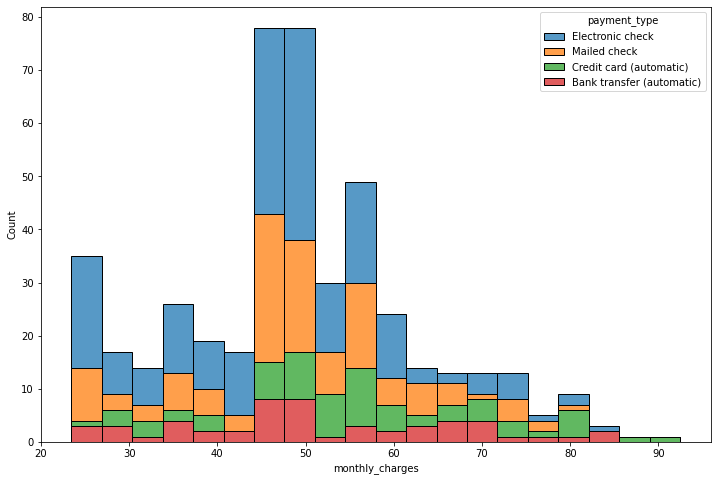

In [174]:
print('Non Churning Customers --- Monthly Charges\n')
print(non_churn.monthly_charges[non_churn.internet_service_type == 'DSL'].describe(),'\n________________________________')
print('Churning Customers --- Monthly Charges\n')
print(churners.monthly_charges[churners.internet_service_type == 'DSL'].describe(),'\n')

plt.figure(figsize=(12,8))
sns.histplot(churners[churners.internet_service_type == 'DSL'],
             x='monthly_charges',
#              kde=True,
             color='Red',
             hue=churners.payment_type,
             multiple='stack'
            )
# sns.histplot(non_churn.monthly_charges[non_churn.internet_service_type == 'DSL'],
#              kde=True,
#              color='Gray'
#             )
plt.show()

Non Churning Customers --- Monthly Charges

count    1799.000000
mean       93.932379
std        12.653712
min        68.600000
25%        84.400000
50%        94.800000
75%       104.400000
max       118.750000
Name: monthly_charges, dtype: float64 
________________________________
Churning Customers --- Monthly Charges

count    1297.000000
mean       88.126484
std        11.882834
min        67.750000
25%        78.800000
50%        87.550000
75%        98.400000
max       118.350000
Name: monthly_charges, dtype: float64 



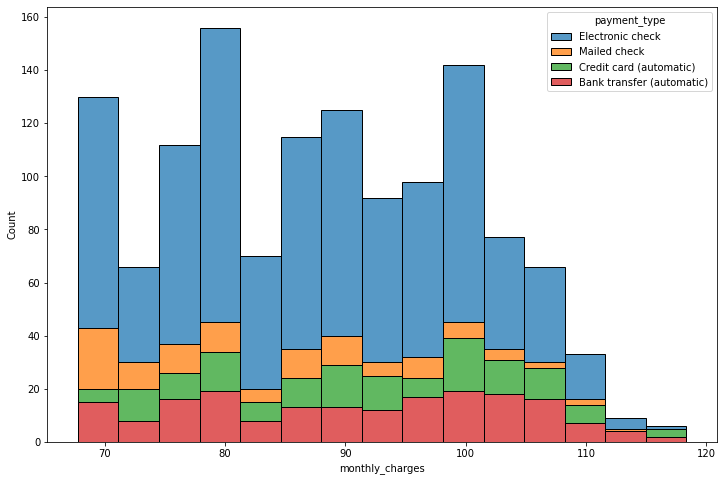

In [175]:
print('Non Churning Customers --- Monthly Charges\n')
print(non_churn.monthly_charges[non_churn.internet_service_type == 'Fiber optic'].describe(),'\n________________________________')
print('Churning Customers --- Monthly Charges\n')
print(churners.monthly_charges[churners.internet_service_type == 'Fiber optic'].describe(),'\n')

plt.figure(figsize=(12,8))
sns.histplot(churners[churners.internet_service_type == 'Fiber optic'],
             x='monthly_charges',
#              kde=True,
             color='Red',
             hue=churners.payment_type,
             multiple='stack'
            )
# sns.histplot(non_churn.monthly_charges[non_churn.internet_service_type == 'Fiber optic'],
#              kde=True,
#              color='Gray'
#             )
plt.show()

In [177]:
train.internet_service_type.value_counts(dropna=False)

Fiber optic    1847
DSL            1462
Name: internet_service_type, dtype: int64

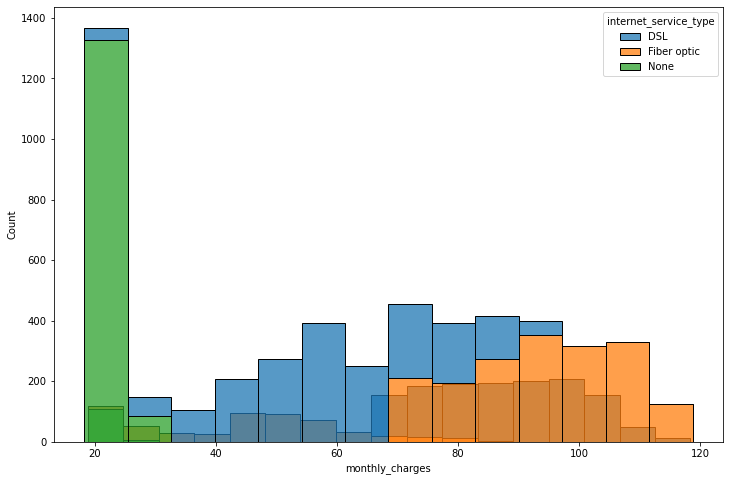

In [185]:
plt.figure(figsize=(12,8))
sns.histplot(churners,#[churners.internet_service_type == 'Fiber optic'],
             x='monthly_charges',
#              kde=True,
             color='Red',
             hue=churners.internet_service_type,
             multiple='stack',
#              col='internet_service_type'
            )
sns.histplot(non_churn,#.monthly_charges[non_churn.internet_service_type == 'Fiber optic'],
#              kde=True,
             x=non_churn.monthly_charges,
             color='Gray',
             hue=non_churn.internet_service_type,
             multiple='stack',
             
            )
plt.show()

In [186]:
for i in df[['partner', 'dependents', 'phone_service',
             'online_security', 'online_backup', 'device_protection',
             'tech_support', 'paperless_billing', 'churn'
            ]]:
    look = df[i].map({'Yes': 1, 'No': 0, })#'No internet service': 0 })
    print(look.value_counts(dropna=False))

0    3641
1    3402
Name: partner, dtype: int64
0    4933
1    2110
Name: dependents, dtype: int64
1    6361
0     682
Name: phone_service, dtype: int64
0.0    3498
1.0    2019
NaN    1526
Name: online_security, dtype: int64
0.0    3088
1.0    2429
NaN    1526
Name: online_backup, dtype: int64
0.0    3095
1.0    2422
NaN    1526
Name: device_protection, dtype: int64
0.0    3473
1.0    2044
NaN    1526
Name: tech_support, dtype: int64
1    4171
0    2872
Name: paperless_billing, dtype: int64
0    5174
1    1869
Name: churn, dtype: int64


In [187]:
df_all = df
for i in df_all[['partner', 'dependents', 'phone_service',
             'online_security', 'online_backup', 'device_protection',
             'tech_support', 'paperless_billing', 'churn'
            ]]:
    look = df_all[i].map({'Yes': 1, 'No': 0, })#'No internet service': 0 })
#     print(look.value_counts(dropna=False))
    df_all[i] = look
df_all

,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type,online_security,online_backup,device_protection,tech_support,contract_type,paperless_billing,payment_type,monthly_charges,total_charges,churn
0,0,1,1,9,1,DSL,0.0,1.0,0.0,1.0,One year,1,Mailed check,65.60,593.30,0
1,0,0,0,9,1,DSL,0.0,0.0,0.0,0.0,Month-to-month,0,Mailed check,59.90,542.40,0
2,0,0,0,4,1,Fiber optic,0.0,0.0,1.0,0.0,Month-to-month,1,Electronic check,73.90,280.85,1
3,1,1,0,13,1,Fiber optic,0.0,1.0,1.0,0.0,Month-to-month,1,Electronic check,98.00,1237.85,1
4,1,1,0,3,1,Fiber optic,0.0,0.0,0.0,1.0,Month-to-month,1,Mailed check,83.90,267.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,13,1,DSL,1.0,0.0,0.0,1.0,One year,0,Mailed check,55.15,742.90,0
7039,0,1,0,22,1,Fiber optic,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,85.10,1873.70,1
7040,0,0,0,2,1,DSL,0.0,1.0,0.0,0.0,Month-to-month,1,Mailed check,50.30,92.75,0
7041,0,1,1,67,1,DSL,1.0,0.0,1.0,1.0,Two year,0,Mailed check,67.85,4627.65,0


In [209]:
df_all.columns.to_list()

['senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'internet_service_type',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'contract_type',
 'paperless_billing',
 'payment_type',
 'monthly_charges',
 'total_charges',
 'churn']

In [210]:
dummy = ['internet_service_type',
 'contract_type',
 'payment_type',
]

In [212]:
dummies = pd.get_dummies(df_all[dummy])

In [214]:
df_all = pd.concat([df_all, dummies], axis=1)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          7043 non-null   int64  
 1   partner                                 7043 non-null   int64  
 2   dependents                              7043 non-null   int64  
 3   tenure                                  7043 non-null   int64  
 4   phone_service                           7043 non-null   int64  
 5   internet_service_type                   7043 non-null   object 
 6   online_security                         5517 non-null   float64
 7   online_backup                           5517 non-null   float64
 8   device_protection                       5517 non-null   float64
 9   tech_support                            5517 non-null   float64
 10  contract_type                           7043 non-null   obje

In [216]:
df_all.drop(columns=dummy, inplace=True)

In [217]:
df_all.columns.to_list()

['senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Bank transfer (automatic)',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [218]:
df_all.drop(columns=['internet_service_type_None',
 'contract_type_Month-to-month',
 'payment_type_Mailed check'], inplace=True)

In [ ]:
df_all = df_all.rename(columns={'senior_citizen': 'senior',
                       'phone_service': 'phone',
                       'online_security': 'security',
                       'online_backup': 'backup',
                       'paperless_billing': 'e_billing',
                       'internet_service_type_DSL':'DSL',
                       'internet_service_type_Fiber optic': 'Fiber',
                       'contract_type_One year': 'one_year',
                       'contract_type_Two year': 'two_year',
                       'payment_type_Bank transfer (automatic)': 'draft',
                       'payment_type_Credit card (automatic)': 'cc',
                       'payment_type_Electronic check': 'e_check'
})

In [340]:
df_all

,senior,partner,dependents,tenure,phone,security,backup,device_protection,tech_support,e_billing,monthly_charges,total_charges,churn,DSL,Fiber,one_year,two_year,draft,cc,e_check
0,0,1,1,9,1,0.0,1.0,0.0,1.0,1,65.60,593.30,0,1,0,1,0,0,0,0
1,0,0,0,9,1,0.0,0.0,0.0,0.0,0,59.90,542.40,0,1,0,0,0,0,0,0
2,0,0,0,4,1,0.0,0.0,1.0,0.0,1,73.90,280.85,1,0,1,0,0,0,0,1
3,1,1,0,13,1,0.0,1.0,1.0,0.0,1,98.00,1237.85,1,0,1,0,0,0,0,1
4,1,1,0,3,1,0.0,0.0,0.0,1.0,1,83.90,267.40,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,13,1,1.0,0.0,0.0,1.0,0,55.15,742.90,0,1,0,1,0,0,0,0
7039,0,1,0,22,1,0.0,0.0,0.0,0.0,1,85.10,1873.70,1,0,1,0,0,0,0,1
7040,0,0,0,2,1,0.0,1.0,0.0,0.0,1,50.30,92.75,0,1,0,0,0,0,0,0
7041,0,1,1,67,1,1.0,0.0,1.0,1.0,0,67.85,4627.65,0,1,0,0,1,0,0,0


In [347]:
df_all['service'] = df_all[services].sum(axis=1)

In [348]:
df_fiber = df_all[df_all.Fiber == 1]
df_fiber

,senior,partner,dependents,tenure,phone,security,backup,device_protection,tech_support,e_billing,...,total_charges,churn,DSL,Fiber,one_year,two_year,draft,cc,e_check,service
2,0,0,0,4,1,0.0,0.0,1.0,0.0,1,...,280.85,1,0,1,0,0,0,0,1,1.0
3,1,1,0,13,1,0.0,1.0,1.0,0.0,1,...,1237.85,1,0,1,0,0,0,0,1,2.0
4,1,1,0,3,1,0.0,0.0,0.0,1.0,1,...,267.40,1,0,1,0,0,0,0,0,1.0
6,1,1,0,71,1,1.0,1.0,1.0,1.0,1,...,7904.25,0,0,1,0,1,1,0,0,4.0
7,0,1,0,63,1,1.0,0.0,0.0,1.0,1,...,5377.80,0,0,1,0,1,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7031,0,0,1,64,1,0.0,1.0,0.0,1.0,1,...,6171.20,0,0,1,0,0,0,1,0,2.0
7034,1,1,1,47,1,0.0,1.0,0.0,0.0,1,...,4018.05,0,0,1,1,0,1,0,0,1.0
7035,0,0,0,7,1,0.0,1.0,0.0,0.0,1,...,633.45,0,0,1,1,0,0,0,0,1.0
7036,0,0,0,1,1,0.0,0.0,0.0,0.0,1,...,70.15,1,0,1,0,0,0,0,0,0.0


In [349]:
df_DSL = df_all[df_all.DSL == 1]
df_DSL

,senior,partner,dependents,tenure,phone,security,backup,device_protection,tech_support,e_billing,...,total_charges,churn,DSL,Fiber,one_year,two_year,draft,cc,e_check,service
0,0,1,1,9,1,0.0,1.0,0.0,1.0,1,...,593.30,0,1,0,1,0,0,0,0,2.0
1,0,0,0,9,1,0.0,0.0,0.0,0.0,0,...,542.40,0,1,0,0,0,0,0,0,0.0
5,0,0,1,9,1,0.0,0.0,0.0,1.0,1,...,571.45,0,1,0,0,0,0,1,0,1.0
8,1,0,0,7,1,1.0,0.0,0.0,0.0,1,...,340.35,0,1,0,0,0,0,0,1,1.0
9,0,1,1,65,1,1.0,1.0,1.0,1.0,1,...,5957.90,0,1,0,0,1,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,0,0,0,28,1,0.0,1.0,0.0,1.0,0,...,1517.50,0,1,0,0,0,1,0,0,2.0
7038,0,0,0,13,1,1.0,0.0,0.0,1.0,0,...,742.90,0,1,0,1,0,0,0,0,2.0
7040,0,0,0,2,1,0.0,1.0,0.0,0.0,1,...,92.75,0,1,0,0,0,0,0,0,1.0
7041,0,1,1,67,1,1.0,0.0,1.0,1.0,0,...,4627.65,0,1,0,0,1,0,0,0,3.0


In [350]:
df_phone = df_all[(df_all.DSL == 0)&(df_all.Fiber == 0)]
df_phone

,senior,partner,dependents,tenure,phone,security,backup,device_protection,tech_support,e_billing,...,total_charges,churn,DSL,Fiber,one_year,two_year,draft,cc,e_check,service
20,1,1,0,50,1,NaN,NaN,NaN,NaN,0,...,1306.30,0,0,0,1,0,0,0,1,0.0
23,0,0,0,3,1,NaN,NaN,NaN,NaN,0,...,57.20,0,0,0,0,0,0,0,0,0.0
24,0,1,1,4,1,NaN,NaN,NaN,NaN,0,...,76.35,1,0,0,0,0,0,0,0,0.0
27,0,1,1,54,1,NaN,NaN,NaN,NaN,0,...,1090.60,0,0,0,0,1,0,1,0,0.0
28,0,0,0,26,1,NaN,NaN,NaN,NaN,1,...,471.85,0,0,0,1,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,0,0,0,6,1,NaN,NaN,NaN,NaN,0,...,129.55,0,0,0,0,0,0,1,0,0.0
7028,0,1,1,67,1,NaN,NaN,NaN,NaN,1,...,1372.90,0,0,0,0,1,1,0,0,0.0
7032,0,1,1,46,1,NaN,NaN,NaN,NaN,0,...,856.50,0,0,0,0,1,0,1,0,0.0
7033,0,0,0,1,1,NaN,NaN,NaN,NaN,0,...,18.90,0,0,0,0,0,0,0,0,0.0


In [351]:
train_fiber, validate_fiber, test_fiber = prepare.split_data(df_fiber, 'churn')

Prepared df: (3096, 21)

Train: (1857, 21)
Validate: (619, 21)
Test: (620, 21)


In [352]:
train_DSL, validate_DSL, test_DSL = prepare.split_data(df_DSL, 'churn')

Prepared df: (2421, 21)

Train: (1452, 21)
Validate: (484, 21)
Test: (485, 21)


In [353]:
train_phone, validate_phone, test_phone = prepare.split_data(df_phone, 'churn')

Prepared df: (1526, 21)

Train: (915, 21)
Validate: (305, 21)
Test: (306, 21)


# Set the columns for X_ and target y_ 

In [354]:
# X_col =
c = train_fiber.columns.to_list()
c.remove('churn')
X_cols = c

In [355]:
y_col = 'churn'

# X_train, val, test - for - fiber, DSL, and phone 

In [356]:
X_train_fiber = train_fiber[X_cols]
y_train_fiber = train_fiber[y_col]

X_validate_fiber = validate_fiber[X_cols]
y_validate_fiber = validate_fiber[y_col]

X_test_fiber = test_fiber[X_cols]
y_test_fiber = test_fiber[y_col]

In [357]:
X_train_DSL = train_DSL[X_cols]
y_train_DSL = train_DSL[y_col]

X_validate_DSL = validate_DSL[X_cols]
y_validate_DSL = validate_DSL[y_col]

X_test_DSL = test_DSL[X_cols]
y_test_DSL = test_DSL[y_col]

In [358]:
X_train_phone = train_phone[X_cols]
y_train_phone = train_phone[y_col]

X_validate_phone = validate_phone[X_cols]
y_validate_phone = validate_phone[y_col]

X_test_phone = test_phone[X_cols]
y_test_phone = test_phone[y_col]

# Define functions for:
  - Random forest models maker
  - Confussion creator

In [235]:
def random_forest_models(num_models, rand_st=123, positive=1, max_samp=1.0, trees=100):
    '''
    random_forest_models is a function that:
        
        Takes in:   num_models=  >> The number of rf models 
                                  you want to create  ;dtype(int)
                       rand_st=  >> Random State  
                                  ;dtype(int) = 123 unless specified
                      positive=  >> what is the positive test 
                                  (0 or 1)
                      max_samp=  >> maximum samples per tree
                                  ;dtype(int, float) = (default)1.0
                                  if int: = number of samples
                                  if float: = percentage of total samples
                         trees=  >> n_estimators: number of trees in the forest
        
Assumed variables apply:
    
                  train: training dataset
               validate: validate dataset
                   test: test dataset

                 X_cols = df.columns.drop('target_y').to_list()
                  y_col = 'target_y'

                X_train = train[X_cols]
                y_train = train[y_col]
             X_validate = validate[X_cols]
             y_validate = validate[y_col]
                 X_test = test[X_cols]
                 y_test = test[y_col]
                 
        Returns: a DataFrame with predictions for each model
    '''
    b = int(y_train.mode())
    preds = pd.DataFrame({
    'actual': y_train,
    'baseline': b,
    })
    depth = 11 #num_models * 2 + 1
#     fig, ax = plt.subplot(nrows = num_models,n)
    best = 1
    for i in range(1, num_models+1):
        depth -= 1
        name = f'model_{i}_depth_{depth}'
        
        rf = RandomForestClassifier(random_state = rand_st, 
                                    min_samples_leaf = i, 
                                    max_depth = depth,
                                    max_samples = max_samp,
                                    n_estimators = trees
                                   )
        rf.fit(X_train, y_train)
        
        preds[name] = rf.predict(X_train)
#         val_name = f'{name}_validate'
        TN, FP, FN, TP = confusion_matrix(preds.actual, preds[name]).ravel()
        print(f'\n{name}\n\n {rf}')
        confusion(TN=TN, TP=TP, FN=FN, FP=FP)
        print(f'Validation score is: {rf.score(X_validate, y_validate):.2%}')
        print('______________________________')
#         preds[val_name] = rf.predict(X_val)
#         plt.subplot(i,i,12)
#         plt.title(f'{name} feature importances')
#         plt.barh(X_train.columns, rf.feature_importances_)
#         plt.show
                
    return preds

In [236]:
def confusion(TN, TP, FN, FP):
    acc = (TP+TN)/(TP+TN+FP+FN)
    pre = (TP/(TP+FP))
    NPV = (TN/(TN+FN))
    rec = (TP/(TP+FN))
    spe = (TN/(TN+FP))
    f1s = stats.hmean([(TP/(TP+FP)),(TP/(TP+FN))])
    print(
    f'''
    _______________________________________________________________________________________
    
    True Positive = {TP} ---- False Positive = {FP}
    True Negative = {TN} ---- False Negative = {FN}
    
    Out of {TP+FN+FP+TN} predictions -- Correct predictions = {TP+TN} (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = {TP+FN} ---- PREDICTED POSITIVE = (TP + FP) = {TP+FP}
    
    REAL NEGATIVE = (TN + FP) = {TN+FP} ---- PREDICTED NEGATIVE = (TN + FN) = {TN+FN}
     
        Accuracy = {acc:.2%} -->> Correct Predictions / Total Predictions
       Precision = {pre:.2%} -->> True Positive / Predicted Positive
             NPV = {NPV:.2%} -->> True Negative / Predicted Negative
          Recall = {rec:.2%} -->> True Positive / Real Positive
     Specificity = {spe:.2%} -->> True Negative / Real Negative
        f1-score = {f1s:.2%} -->> Harmonic Mean of Precision and Recall
    _______________________________________________________________________________________
    '''
    )

# Set train, validate, and test to: Fiber

In [238]:
# Set model X and y to Fiber
X_train = X_train_fiber
y_train = y_train_fiber
X_validate = X_validate_fiber
y_validate = y_validate_fiber
X_test = X_test_fiber
y_test = y_test_fiber

# Set train, validate, and test to: DSL

In [360]:
# Set model X and y to DSL
X_train = X_train_DSL
y_train = y_train_DSL
X_validate = X_validate_DSL
y_validate = y_validate_DSL
X_test = X_test_DSL
y_test = y_test_DSL

# Set train, validate, and test to: Phone

In [238]:
# Set model X and y to phone
X_train = X_train_phone
y_train = y_train_phone
X_validate = X_validate_phone
y_validate = y_validate_phone
X_test = X_test_phone
y_test = y_test_phone

# Models 

In [239]:
preds1_fiber = random_forest_models(9, trees=1000, max_samp=.8)


model_1_depth_10

 RandomForestClassifier(max_depth=10, max_samples=0.8, n_estimators=1000,
                       random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 704 ---- False Positive = 113
    True Negative = 966 ---- False Negative = 74
    
    Out of 1857 predictions -- Correct predictions = 1670 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 778 ---- PREDICTED POSITIVE = (TP + FP) = 817
    
    REAL NEGATIVE = (TN + FP) = 1079 ---- PREDICTED NEGATIVE = (TN + FN) = 1040
     
        Accuracy = 89.93% -->> Correct Predictions / Total Predictions
       Precision = 86.17% -->> True Positive / Predicted Positive
             NPV = 92.88% -->> True Negative / Predicted Negative
          Recall = 90.49% -->> True Positive / Real Positive
     Specificity = 89.53% -->> True Negative / Real Negative
        f1-score = 88.28% -->> Harmonic Mean of Precision and Recall
    ___________


model_9_depth_2

 RandomForestClassifier(max_depth=2, max_samples=0.8, min_samples_leaf=9,
                       n_estimators=1000, random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 454 ---- False Positive = 232
    True Negative = 847 ---- False Negative = 324
    
    Out of 1857 predictions -- Correct predictions = 1301 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 778 ---- PREDICTED POSITIVE = (TP + FP) = 686
    
    REAL NEGATIVE = (TN + FP) = 1079 ---- PREDICTED NEGATIVE = (TN + FN) = 1171
     
        Accuracy = 70.06% -->> Correct Predictions / Total Predictions
       Precision = 66.18% -->> True Positive / Predicted Positive
             NPV = 72.33% -->> True Negative / Predicted Negative
          Recall = 58.35% -->> True Positive / Real Positive
     Specificity = 78.50% -->> True Negative / Real Negative
        f1-score = 62.02% -->> Harmonic Mean of Precision and Rec

In [233]:
fiber_rf = RandomForestClassifier()
fiber_rf.fit(X_train_fiber, y_train_fiber)
y_pred_fiber_01 = fiber_rf.predict(X_train_fiber)

In [234]:
print(f'training score: {fiber_rf.score(X_train_fiber, y_train_fiber):.2%}')
print(f'validate score: {fiber_rf.score(X_validate_fiber, y_validate_fiber):.2%}')

training score: 100.00%
validate score: 72.54%


In [365]:
logit = LogisticRegression(random_state=123, 
                           C=.1, 
                           solver='liblinear', 
                           penalty='l1',
                           max_iter= 1_000
                          )

logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)
# y_pred # Check √

y_pred_validate = logit.predict(X_validate)
# y_pred_validate # Check √

y_pred_test = logit.predict(X_test)
# y_pred_test # Check √

TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
print(f'\nTrain Scores: \n\n{logit}')
confusion(TN=TN, TP=TP, FN=FN, FP=FP)

TNv, FPv, FNv, TPv = confusion_matrix(y_validate, y_pred_validate).ravel()
print(f'\nValidate Scores: ') # \n\n {rf_try_2}')
confusion(TN=TNv, TP=TPv, FN=FNv, FP=FPv)

# TNt, FPt, FNt, TPt = confusion_matrix(y_test, y_pred_test).ravel()
# print(f'\nTest Scores:') # \n\n {rf_try_2}')
# confusion(TN=TNt, TP=TPt, FN=FNt, FP=FPt)


Train Scores: 

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=123,
                   solver='liblinear')

    _______________________________________________________________________________________
    
    True Positive = 43 ---- False Positive = 17
    True Negative = 1160 ---- False Negative = 232
    
    Out of 1452 predictions -- Correct predictions = 1203 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 275 ---- PREDICTED POSITIVE = (TP + FP) = 60
    
    REAL NEGATIVE = (TN + FP) = 1177 ---- PREDICTED NEGATIVE = (TN + FN) = 1392
     
        Accuracy = 82.85% -->> Correct Predictions / Total Predictions
       Precision = 71.67% -->> True Positive / Predicted Positive
             NPV = 83.33% -->> True Negative / Predicted Negative
          Recall = 15.64% -->> True Positive / Real Positive
     Specificity = 98.56% -->> True Negative / Real Negative
        f1-score = 25.67% -->> Harmonic Mean of Precision and Recall
    _________________

# This is it! - Fiber

In [330]:
logit = LogisticRegression(random_state=123, C=.9,max_iter=1_000, solver='liblinear', penalty='l1')

logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)
# y_pred # Check √

y_pred_validate = logit.predict(X_validate)
# y_pred_validate # Check √

y_pred_test = logit.predict(X_test)
# y_pred_test # Check √

TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
print(f'\nTrain Scores: \n\n{logit}')
confusion(TN=TN, TP=TP, FN=FN, FP=FP)

TNv, FPv, FNv, TPv = confusion_matrix(y_validate, y_pred_validate).ravel()
print(f'\nValidate Scores: ') # \n\n {rf_try_2}')
confusion(TN=TNv, TP=TPv, FN=FNv, FP=FPv)

TNt, FPt, FNt, TPt = confusion_matrix(y_test, y_pred_test).ravel()
print(f'\nTest Scores:') # \n\n {rf_try_2}')
confusion(TN=TNt, TP=TPt, FN=FNt, FP=FPt)


Train Scores: 

LogisticRegression(C=0.9, max_iter=1000, penalty='l1', random_state=123,
                   solver='liblinear')

    _______________________________________________________________________________________
    
    True Positive = 542 ---- False Positive = 282
    True Negative = 797 ---- False Negative = 236
    
    Out of 1857 predictions -- Correct predictions = 1339 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 778 ---- PREDICTED POSITIVE = (TP + FP) = 824
    
    REAL NEGATIVE = (TN + FP) = 1079 ---- PREDICTED NEGATIVE = (TN + FN) = 1033
     
        Accuracy = 72.11% -->> Correct Predictions / Total Predictions
       Precision = 65.78% -->> True Positive / Predicted Positive
             NPV = 77.15% -->> True Negative / Predicted Negative
          Recall = 69.67% -->> True Positive / Real Positive
     Specificity = 73.86% -->> True Negative / Real Negative
        f1-score = 67.67% -->> Harmonic Mean of Precision and Recall
    _______________

In [331]:
# fiber = logit
fiber

LogisticRegression(C=0.9, max_iter=1000, penalty='l1', random_state=123,
                   solver='liblinear')

In [359]:
fiber.predict(X_train_fiber)

array([1, 1, 1, ..., 1, 1, 1])

In [334]:
fiber.predict_proba(X_train_fiber)

array([[0.22332884, 0.77667116],
       [0.43036986, 0.56963014],
       [0.25173533, 0.74826467],
       ...,
       [0.29467465, 0.70532535],
       [0.398675  , 0.601325  ],
       [0.26895587, 0.73104413]])

In [331]:
# DSL = logit
DSL

LogisticRegression(C=0.9, max_iter=1000, penalty='l1', random_state=123,
                   solver='liblinear')

In [331]:
# phone = logit
phone

LogisticRegression(C=0.9, max_iter=1000, penalty='l1', random_state=123,
                   solver='liblinear')

# This is best on DSL 35% recall...

In [366]:
rfc = RandomForestClassifier(max_depth=6, max_samples=1.0,
                             min_samples_leaf=4, min_samples_split=20,
                             n_estimators=10_000,
                       random_state=123)
# logit = LogisticRegression(random_state=123, C=.25,max_iter=1000)# solver='liblinear', penalty='l1')

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_train)
# y_pred # Check √

y_pred_validate = rfc.predict(X_validate)
# y_pred_validate # Check √

y_pred_test = rfc.predict(X_test)
# y_pred_test # Check √

TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
print(f'\nTrain Scores: \n\n{rfc}')
confusion(TN=TN, TP=TP, FN=FN, FP=FP)

TNv, FPv, FNv, TPv = confusion_matrix(y_validate, y_pred_validate).ravel()
print(f'\nValidate Scores: ') # \n\n {rf_try_2}')
confusion(TN=TNv, TP=TPv, FN=FNv, FP=FPv)

# TNt, FPt, FNt, TPt = confusion_matrix(y_test, y_pred_test).ravel()
# print(f'\nTest Scores:') # \n\n {rf_try_2}')
# confusion(TN=TNt, TP=TPt, FN=FNt, FP=FPt)


Train Scores: 

RandomForestClassifier(max_depth=6, max_samples=1.0, min_samples_leaf=4,
                       min_samples_split=20, n_estimators=10000,
                       random_state=123)

    _______________________________________________________________________________________
    
    True Positive = 97 ---- False Positive = 34
    True Negative = 1143 ---- False Negative = 178
    
    Out of 1452 predictions -- Correct predictions = 1240 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 275 ---- PREDICTED POSITIVE = (TP + FP) = 131
    
    REAL NEGATIVE = (TN + FP) = 1177 ---- PREDICTED NEGATIVE = (TN + FN) = 1321
     
        Accuracy = 85.40% -->> Correct Predictions / Total Predictions
       Precision = 74.05% -->> True Positive / Predicted Positive
             NPV = 86.53% -->> True Negative / Predicted Negative
          Recall = 35.27% -->> True Positive / Real Positive
     Specificity = 97.11% -->> True Negative / Real Negative
        f1-score = 47.

In [383]:
y_pred = fiber.predict(X_train)
# y_pred # Check √

y_pred_validate = fiber.predict(X_validate)
# y_pred_validate # Check √

y_pred_test = fiber.predict(X_test)
# y_pred_test # Check √

TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
print(f'\nTrain Scores: \n\n{fiber}')
confusion(TN=TN, TP=TP, FN=FN, FP=FP)

TNv, FPv, FNv, TPv = confusion_matrix(y_validate, y_pred_validate).ravel()
print(f'\nValidate Scores: ') # \n\n {rf_try_2}')
confusion(TN=TNv, TP=TPv, FN=FNv, FP=FPv)

TNt, FPt, FNt, TPt = confusion_matrix(y_test, y_pred_test).ravel()
print(f'\nTest Scores:') # \n\n {rf_try_2}')
confusion(TN=TNt, TP=TPt, FN=FNt, FP=FPt)


Train Scores: 

LogisticRegression(C=0.9, max_iter=1000, penalty='l1', random_state=123,
                   solver='liblinear')

    _______________________________________________________________________________________
    
    True Positive = 115 ---- False Positive = 107
    True Negative = 1070 ---- False Negative = 160
    
    Out of 1452 predictions -- Correct predictions = 1185 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 275 ---- PREDICTED POSITIVE = (TP + FP) = 222
    
    REAL NEGATIVE = (TN + FP) = 1177 ---- PREDICTED NEGATIVE = (TN + FN) = 1230
     
        Accuracy = 81.61% -->> Correct Predictions / Total Predictions
       Precision = 51.80% -->> True Positive / Predicted Positive
             NPV = 86.99% -->> True Negative / Predicted Negative
          Recall = 41.82% -->> True Positive / Real Positive
     Specificity = 90.91% -->> True Negative / Real Negative
        f1-score = 46.28% -->> Harmonic Mean of Precision and Recall
    ______________

In [387]:
all_pred = fiber.predict(df_all[X_cols][(df_all.DSL == 1)|(df_all.Fiber == 1)])
y_act = df_all['churn'][(df_all.DSL == 1)|(df_all.Fiber == 1)]
TN, FP, FN, TP = confusion_matrix(all_pred, y_act).ravel()
print('Total Score:\n\n')
confusion(TN= TN, TP=TP, FN=FN, FP=FP)

Total Score:



    _______________________________________________________________________________________
    
    True Positive = 1102 ---- False Positive = 654
    True Negative = 3118 ---- False Negative = 643
    
    Out of 5517 predictions -- Correct predictions = 4220 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 1745 ---- PREDICTED POSITIVE = (TP + FP) = 1756
    
    REAL NEGATIVE = (TN + FP) = 3772 ---- PREDICTED NEGATIVE = (TN + FN) = 3761
     
        Accuracy = 76.49% -->> Correct Predictions / Total Predictions
       Precision = 62.76% -->> True Positive / Predicted Positive
             NPV = 82.90% -->> True Negative / Predicted Negative
          Recall = 63.15% -->> True Positive / Real Positive
     Specificity = 82.66% -->> True Negative / Real Negative
        f1-score = 62.95% -->> Harmonic Mean of Precision and Recall
    _______________________________________________________________________________________
    


In [339]:
X_train_DSL

,senior,partner,dependents,tenure,phone,security,backup,device_protection,tech_support,e_billing,monthly_charges,total_charges,DSL,Fiber,one_year,two_year,draft,cc,e_check
6128,1,0,0,16,1,0.0,0.0,0.0,1.0,0,59.40,1023.90,1,0,0,0,0,0,1
6492,0,1,0,13,0,1.0,0.0,0.0,1.0,1,54.45,706.85,1,0,0,0,0,0,1
6572,0,1,1,59,1,1.0,1.0,1.0,1.0,0,90.30,5194.05,1,0,0,1,0,1,0
5463,0,1,1,64,1,1.0,0.0,1.0,0.0,1,73.05,4688.65,1,0,1,0,0,1,0
4035,0,0,0,1,1,0.0,0.0,0.0,0.0,1,45.40,45.40,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,0,0,0,1,1,0.0,1.0,0.0,0.0,0,49.50,49.50,1,0,0,0,0,0,1
3186,0,1,0,11,1,0.0,0.0,0.0,0.0,1,44.05,483.70,1,0,0,0,0,0,1
5620,0,0,0,72,1,1.0,1.0,0.0,0.0,0,59.75,4265.00,1,0,0,1,1,0,0
933,0,1,0,22,1,1.0,0.0,0.0,0.0,1,59.75,1374.35,1,0,1,0,1,0,0


In [382]:
px.sunburst(pd.concat([X_train, y_train], axis=1),
            path=('churn', 'security', 'service'),
            color= 'monthly_charges'
           )

In [308]:
px.sunburst(pd.concat([X_train, y_train], axis=1),
            path=('churn', 'backup', 'service'),
            color= 'monthly_charges'
           )

In [309]:
px.sunburst(pd.concat([X_train, y_train], axis=1),
            path=('churn', 'device_protection', 'service'),
            color= 'monthly_charges'
           )

In [310]:
px.sunburst(pd.concat([X_train, y_train], axis=1),
            path=('churn', 'tech_support', 'service'),
            color= 'monthly_charges'
           )

# Services

In [297]:
services = ['security', 'backup', 'device_protection', 'tech_support']

In [277]:
X_train['service'] = X_train.security + X_train.backup +\
X_train.device_protection + X_train.tech_support

In [280]:
X_validate['service'] = X_validate.security + X_validate.backup +\
X_validate.device_protection + X_validate.tech_support

In [281]:
X_test['service'] = X_test.security + X_test.backup +\
X_test.device_protection + X_test.tech_support

In [346]:
# X_train[services].sum(axis=1)

# KNN testing 

In [367]:
X_train_knn = X_train.drop(columns=([#'total_charges',
                                     'monthly_charges', 
#                                      'senior',
                                     'phone', 'DSL', 'Fiber',
                                     'security', 'backup', 'device_protection', 'tech_support'
                                     ]
                                   ))
X_validate_knn = X_validate.drop(columns=([#'total_charges',
                                     'monthly_charges', 
#                                      'senior',
                                     'phone', 'DSL', 'Fiber',
                                     'security', 'backup', 'device_protection', 'tech_support'
                                     ]
                                   ))
X_test_knn = X_test.drop(columns=([#'total_charges',
                                     'monthly_charges', 
#                                      'senior',
                                     'phone', 'DSL', 'Fiber',
                                     'security', 'backup', 'device_protection', 'tech_support'
                                     ]
                                   ))

In [381]:
knn = KNeighborsClassifier(n_neighbors= 3,
                           n_jobs=1,
#                            weights= 'distance'
                           weights= 'uniform'

                          )
knn.fit(X_train_knn, y_train)

y_pred = knn.predict(X_train_knn)
# y_pred # Check √

y_pred_validate = knn.predict(X_validate_knn)
# y_pred_validate # Check √

y_pred_test = knn.predict(X_test_knn)
# y_pred_test # Check √

TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
print(f'\nTrain Scores: \n\n{knn}')
confusion(TN=TN, TP=TP, FN=FN, FP=FP)

TNv, FPv, FNv, TPv = confusion_matrix(y_validate, y_pred_validate).ravel()
print(f'\nValidate Scores: ') # \n\n {rf_try_2}')
confusion(TN=TNv, TP=TPv, FN=FNv, FP=FPv)

# TNt, FPt, FNt, TPt = confusion_matrix(y_test, y_pred_test).ravel()
# print(f'\nTest Scores:') # \n\n {rf_try_2}')
# confusion(TN=TNt, TP=TPt, FN=FNt, FP=FPt)


Train Scores: 

KNeighborsClassifier(n_jobs=1, n_neighbors=3)

    _______________________________________________________________________________________
    
    True Positive = 142 ---- False Positive = 57
    True Negative = 1120 ---- False Negative = 133
    
    Out of 1452 predictions -- Correct predictions = 1262 (True Pos + True Neg) 
    
    REAL POSITIVE = (TP + FN) = 275 ---- PREDICTED POSITIVE = (TP + FP) = 199
    
    REAL NEGATIVE = (TN + FP) = 1177 ---- PREDICTED NEGATIVE = (TN + FN) = 1253
     
        Accuracy = 86.91% -->> Correct Predictions / Total Predictions
       Precision = 71.36% -->> True Positive / Predicted Positive
             NPV = 89.39% -->> True Negative / Predicted Negative
          Recall = 51.64% -->> True Positive / Real Positive
     Specificity = 95.16% -->> True Negative / Real Negative
        f1-score = 59.92% -->> Harmonic Mean of Precision and Recall
    _________________________________________________________________________________